In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report, roc_curve, auc)
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv('EN_combined_train_with_labels.csv.gz')
df

,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0,ED,HWP,LQ80,...,current_kurtosis,total_power,time_to_main_peak,time_to_peak,late_over_early,tdrift99,tfr,peak_count,gbn,bpr
0,0_train_0,582.364295,False,True,True,True,957,3409.0,2299.0,-717094.898532,...,2.117825,1.709302e+09,85,85,0.987910,85.0,0.142357,3,1.198436,0.059642
1,1_train_0,250.159995,False,True,True,True,948,3404.0,2446.0,-331957.541919,...,2.058622,2.991376e+08,87,87,0.988301,87.0,0.151160,3,1.381123,0.061975
2,2_train_0,1212.323954,False,True,False,True,965,3411.0,2262.0,-425532.152706,...,-0.067003,6.244385e+08,95,95,0.987491,95.0,0.142606,3,1.361857,0.050813
3,3_train_0,240.878110,False,True,True,False,927,3408.0,2833.0,-306980.459766,...,2.443885,2.811583e+08,116,116,0.988450,116.0,0.133192,2,1.165654,0.062954
4,4_train_0,285.124189,False,True,True,False,958,3406.0,2397.0,-362746.925366,...,-0.173890,3.885442e+08,94,94,0.988541,94.0,0.145504,7,1.390918,0.055013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039995,1039995_train_15,210.834626,True,True,True,True,949,3403.0,2533.0,-278607.352936,...,2.026649,2.133856e+08,90,90,0.985736,90.0,0.151747,6,1.008092,0.062825
1039996,1039996_train_15,380.170340,True,True,True,True,949,3404.0,2426.0,-477777.966558,...,1.943512,6.842378e+08,82,82,0.987814,79.0,0.150305,3,1.245492,0.062706
1039997,1039997_train_15,370.109563,False,True,True,True,947,3409.0,2417.0,-466589.983952,...,1.601361,6.641180e+08,102,102,0.987833,102.0,0.142950,2,1.149456,0.062153
1039998,1039998_train_15,98.258524,True,True,True,False,921,3400.0,3799.0,-143212.214717,...,3.825219,4.630840e+07,92,92,0.989948,92.0,0.153135,5,1.192639,0.065264


In [32]:
y = df['psd_label_low_avse']
X = df.drop(columns = ["id","energy_label","psd_label_low_avse","psd_label_high_avse","psd_label_dcr","psd_label_lq"])

In [33]:
X.isna().sum().sort_values(ascending=False)

HWP                        5
PPR                        5
tdrift99                   5
tp0                        0
time_to_main_peak          0
gbn                        0
peak_count                 0
tfr                        0
late_over_early            0
time_to_peak               0
current_kurtosis           0
total_power                0
ED                         0
tail_charge_diff           0
spectral_centroid_power    0
current_skewness           0
SC                         0
LQ80                       0
bpr                        0
dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8124182692307692
Precision: 0.7567114732873843
Recall: 0.8551786463544524
F1: 0.8029374775875915
ROC AUC: 0.8780981413789519
Confusion Matrix:
 [[89495 25556]
 [13461 79488]]
              precision    recall  f1-score   support

       False       0.87      0.78      0.82    115051
        True       0.76      0.86      0.80     92949

    accuracy                           0.81    208000
   macro avg       0.81      0.82      0.81    208000
weighted avg       0.82      0.81      0.81    208000



A logistic regression baseline using waveform-derived features achieves 81% accuracy and an ROC-AUC of 0.88, indicating strong separability between low_avse classes. The model favors recall (0.86) over precision (0.76), successfully capturing most low_avse events while allowing some false positives.

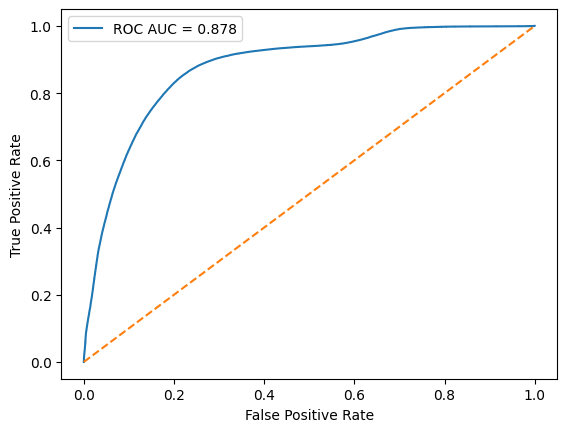

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [42]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring="roc_auc",
    cv=5
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [44]:
y_pred_GSCV = best_model.predict(X_test)  
y_prob_GSCV = best_model.predict_proba(X_test)[:, 1]

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred_GSCV))
print("Precision:", precision_score(y_test, y_pred_GSCV))
print("Recall:", recall_score(y_test, y_pred_GSCV))
print("F1:", f1_score(y_test, y_pred_GSCV))
print("ROC AUC:", roc_auc_score(y_test, y_prob_GSCV))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_GSCV))
print(classification_report(y_test, y_pred))

Accuracy: 0.8124615384615385
Precision: 0.7567078800338845
Recall: 0.8553292665870531
F1: 0.8030018382724279
ROC AUC: 0.8781489308710433
Confusion Matrix:
 [[89490 25561]
 [13447 79502]]
              precision    recall  f1-score   support

       False       0.87      0.78      0.82    115051
        True       0.76      0.86      0.80     92949

    accuracy                           0.81    208000
   macro avg       0.81      0.82      0.81    208000
weighted avg       0.82      0.81      0.81    208000



In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    scoring="roc_auc",
    cv=5
)

scores.mean(), scores.std()


(np.float64(0.8787414765639678), np.float64(0.0004175594295041725))

In [74]:
import numpy as np

corr = pd.DataFrame(X).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.95)]
X_reduced = pd.DataFrame(X).drop(columns=to_drop)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
y_prob = model.predict_proba(X_test)[:, 1]

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8123557692307692
Precision: 0.7566520377369268
Recall: 0.8551033362381522
F1: 0.8028708230635582
ROC AUC: 0.8780552963875057
Confusion Matrix:
 [[89489 25562]
 [13468 79481]]
              precision    recall  f1-score   support

       False       0.87      0.78      0.82    115051
        True       0.76      0.86      0.80     92949

    accuracy                           0.81    208000
   macro avg       0.81      0.82      0.81    208000
weighted avg       0.82      0.81      0.81    208000



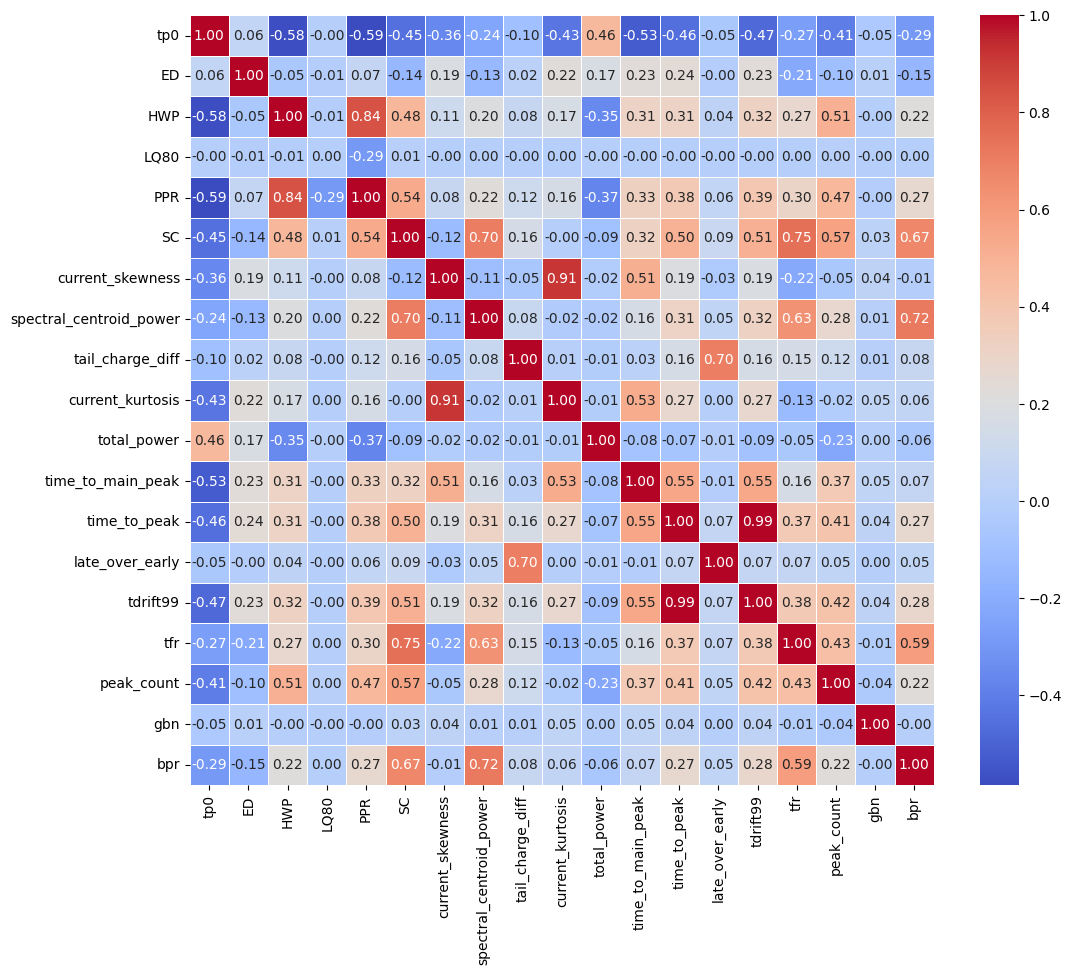

In [70]:
import seaborn as sns
correlation_matrix = pd.DataFrame(X).corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)
plt.show()


In [72]:
l1_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    max_iter=1000
)

l1_model.fit(X_train, y_train)

selected_features = X.columns[l1_model.coef_[0] != 0]
selected_features

Index(['tp0', 'ED', 'HWP', 'LQ80', 'PPR', 'SC', 'current_skewness',
       'spectral_centroid_power', 'tail_charge_diff', 'current_kurtosis',
       'total_power', 'time_to_main_peak', 'time_to_peak', 'late_over_early',
       'tdrift99', 'tfr', 'peak_count', 'gbn', 'bpr'],
      dtype='object')

In [82]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
})

coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coef", ascending=False)

coef_df


,feature,coefficient,abs_coef
18,bpr,3.119689,3.119689
7,spectral_centroid_power,1.962433,1.962433
6,current_skewness,1.662057,1.662057
11,time_to_main_peak,-1.405619,1.405619
3,LQ80,-0.836532,0.836532
10,total_power,-0.802106,0.802106
15,tfr,0.433749,0.433749
12,time_to_peak,-0.420561,0.420561
4,PPR,0.348414,0.348414
14,tdrift99,0.334527,0.334527
